# Assignment 2, task 2
**Xijia Liu, Umeå University**

## Task 2: Nonlinear feature extraction approach, Autoencoder

**Background**: In the previous lecture, we learned a nonlinear version of PCA, KPCA, based on feature mappings and kernel tricks. In fact, there is another idea to modify PCA to a nonlinear feature extraction approach based on neural networkd. Indeed, the second formulation of PCA which is based on image reconstruction can be understood as a special neural network that has identical input and output layers. If we add more hidden layers and use a nonlinear activation function, then will come up with the nonlinear model for feature extraction, Autoencoder. 

**Task description**: in this task, we will implement a simple Autoencoder model with MNIST data.

### Task 2.1: Data import, visualization, and preprocess

Import the MNIST data from Tensorflow and visualize 25 random selected images. In order to reduce the burden of the learning process, we normalize the pixel values such that the values are ranging between 0 and 1.

(60000, 28, 28)
(10000, 28, 28)


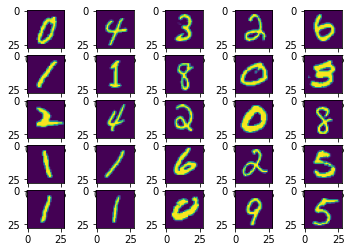

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#Plot 25 random numbers
for i in range(25):
  ax = plt.subplot(5, 5, i+1)
  plt.imshow(x_train[np.random.randint(0, len(x_train))])

print(x_train.shape)
print(x_test.shape)


### Task 2.2: Build the model

Apply the 'sequential' approach to build a simple Autoencoder model. In the encoder part, we add three hidden layers (dense layer) with 128, 64, and 32 neurons respectively. Correspondingly, we include three hidden layers with 64, 128, and 784 neurons respectively in the decoder part. All neurons except the last hidden layer use the Relu function as activation function. Since the all the pixel values have been normalized, all the neurons in the last hidden layer should equip with 'sigmoid' function as activation functions. Once the Autoencoder model is ready, use 'summary' method to visualize the structure of the model. 

In [24]:
# import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Applying the sequentail approach to build a simple autoencoder model 
autoencoder = Sequential()

# We add 3 hidden layers(dense layer) with 128, 64 and 32 neurons. 
# Here we decrease the numbers of hidden layers
autoencoder.add(Dense(128, activation='relu', input_shape=(784,)))
autoencoder.add(Dense(64, activation='relu'))
autoencoder.add(Dense(32, activation='relu'))

#we add three hidden layers with 64, 128, and 784 neurons respectively
# Here we increase the number of hidden layers 
autoencoder.add(Dense(64, activation='relu'))
autoencoder.add(Dense(128, activation='relu'))
autoencoder.add(Dense(784, activation='sigmoid'))

autoencoder.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 64)                2112      
                                                                 
 dense_28 (Dense)            (None, 128)               8320      
                                                                 
 dense_29 (Dense)            (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

### Task 2.3: Compile the model

Choose a proper loss function, use 'Adam' optimizer with learing rate $0.01$, and specify 'mse' as performance metric to compile the model define in the previous subtask.

In [25]:
# Compile the model using adam, lr=0.01, loss= mse. To optimize this a grid search could be done to get a better value of the hyperparameters lr. 
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                    loss='mse',
                    metrics=['mse'])


### Task 2.4: Training

Train the model with training data 100 epochs. Setting the 'batch_size' as 256 and applying 'shuffle' could be a good idea.  

In [26]:
# Train the model. Using 100 epochs 
history = autoencoder.fit(x_train.reshape(-1, 784), x_train.reshape(-1, 784),
                          epochs=100,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test.reshape(-1, 784), x_test.reshape(-1, 784)))


Epoch 1/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0496 - mse: 0.0496 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - 

### Task 2.5: Visulazing the approximated image 

Apply 'predict' method to reconstruct the images both in training set and testing set. Randomly visualize 25 reconstructed images from both sets. 

313/313 [==============================] - 0s 787us/step


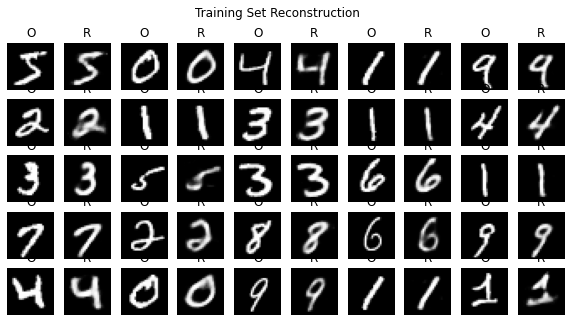

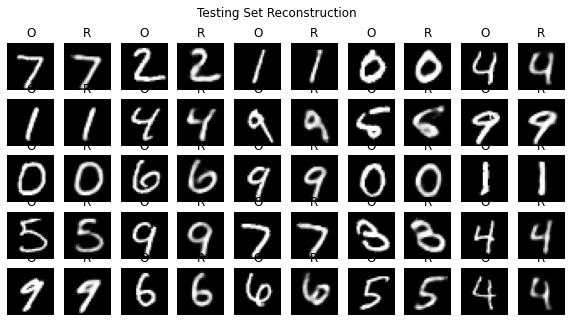

In [27]:
import matplotlib.pyplot as plt

reconstructed_train_images = autoencoder.predict(x_train.reshape(-1, 784))
reconstructed_test_images = autoencoder.predict(x_test.reshape(-1, 784))

def display_images(original_images, reconstructed_images, title):
    plt.figure(figsize=(10, 5))
    
    #Randomly visualize 25 reconstructed images from both sets.
    for i in range(25):
        # Original Images
        plt.subplot(5, 10, 2*i + 1)
        plt.imshow(original_images[i].reshape(28, 28), cmap='gray')
        plt.title("O")
        plt.axis('off')
        
        # Reconstructed Images
        plt.subplot(5, 10, 2*i + 2)
        plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
        plt.title("R")
        plt.axis('off')
    
    plt.suptitle(title)
    plt.show()

display_images(x_train, reconstructed_train_images, title="Training")
display_images(x_test, reconstructed_test_images, title="Testing")


### Task 2.6: Extract the features

All the neurons of the last layer in the encoder part can be viewed as extracted features. Please write a program to extract all the feature variables of images both in training set and testing set. 

**Tips**: Recall how we defined a regression model with pre-determined coefficients in the first example notebook.

In [28]:
#The model
encoder_model = tf.keras.Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)

#Training features encoded
encoded_train_features = encoder_model.predict(x_train.reshape(-1, 784))
#Testing features encoded
encoded_test_features = encoder_model.predict(x_test.reshape(-1, 784))

print("Shape of encoded training features:", encoded_train_features.shape)
print("Shape of encoded testing features:", encoded_test_features.shape)


313/313 [==============================] - 0s 556us/step
Shape of encoded training features: (60000, 32)
Shape of encoded testing features: (10000, 32)


### Task 2.7: Train multinomial regression models

There are 32 extracted features based on the Autoencoder model and we are going to replace the 784 raw pixel values with them. In other words, we have significantly reduced the dimension of our problem. Although our Autoencoder has only a very simple architecture, the extracted feature is still very useful. Suppose we have a large set of images, however, only 100 observations are annotated, i.e. have target variable (labels). If we use the raw pixel variables as predictors (features) to train a multinomial regression model using the 100 annotated observations, then there must be a high risk of overfitting problems. However, if we train the multinomial regression model using extracted 32 neurons as predictors, then could reduce this risk and improve the generalization ability. 

**Task**: train two multinomial regression models using the first 100 observations in the training set. The first model uses the 784 raw pixels as input and the second model use the 32 extracted features as inputs. Compare the performance of the two models in the testing set.

**Tips**: How to train a multinomial regression in Tensorflow? Let's think about another question instead. Imagine, if we have a binary classification neural network model with no hidden layers, and the activation function of the output layer is the sigmoid function, then what statistical model is this model equivalent to?

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Different X for training
x = x_train[:100].reshape(-1, 784)
x_encoded = encoded_train_features[:100]
# target
y = y_train[:100]

#Model for the raw pixels
model = LogisticRegression(multi_class = 'multinomial', max_iter = 1000)
model.fit(x, y)

#Model for the encoded pixels
model_extracted = LogisticRegression(multi_class = 'multinomial', max_iter = 1000)
model_extracted.fit(x_encoded, y)

#Flaten the x vector for predictions
x_test_flat = x_test.reshape(-1, 784)

#Make prediciton for both the models 
y_pred_raw_pixels = model.predict(x_test_flat)
y_pred_extracted_features = model_extracted.predict(encoded_test_features)

#Calculating the score
accuracy_raw_pixels = accuracy_score(y_test, y_pred_raw_pixels)
accuracy_extracted_features = accuracy_score(y_test, y_pred_extracted_features)

#Print the accuarcy for the two models
print("Accuracy using raw pixels:", accuracy_raw_pixels)
print("Accuracy using extracted features:", accuracy_extracted_features)


[7 2 1 ... 9 5 6]
Accuracy using raw pixels: 0.675
Accuracy using extracted features: 0.753
